In [43]:
#Imports
import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [44]:
#Importing data and setting columns
data = library.loadList('exoplanet.csv')
col = {'mass':2,'radius':3}

In [46]:
#Function for getting density parameter
def getDensity(mass,radius):
    mass = float(mass)
    radius = float(radius)
    mass *= 1.898*(10**30)
    radius *= 6991100000
    density = mass / (4/3*(pi*radius**3))
    cleanDensity = round(density,2)
    return cleanDensity

In [103]:
#Lists
massList = []
radiusList = []
densityList = []
masterList = []
#Data processing
for n in range(len(data)):
    mass = data[n][col['mass']]
    radius = data[n][col['radius']]
    name = data[n][0]
    #Manually restricting the mass and radius outliers
    if mass != '' and float(mass) <= 3 and radius != '' and float(radius) <= 2:
        density = getDensity(mass,radius)
        densityList.append(density)
        masterList += [[name, float(mass), float(radius), density]]

#Printing the master list (mass, radius, density parameters)
print('MASS, RADIUS, DENSITY:')
print(masterList)

MASS, RADIUS, DENSITY:
[['KOI-1843.03', 0.0014, 0.054, 11.79], ['Kepler-9 b', 0.25, 0.84, 0.56], ['Kepler-9 c', 0.17, 0.82, 0.41], ['Kepler-9 d', 0.022, 0.147, 9.18], ['WASP-124 b', 0.6, 1.24, 0.42], ['WASP-82 b', 1.24, 1.67, 0.35], ['Gliese 1214 b', 0.0195, 0.2525, 1.61], ['Kepler-131 b', 0.05074, 0.219624, 6.35], ['Kepler-131 c', 0.025952, 0.076549, 76.72], ['CoRoT-24 c', 0.088, 0.44, 1.37], ['WASP-108 b', 0.892, 1.284, 0.56], ['Kepler-101 b', 0.161, 0.515, 1.56], ['OGLE-TR-10 b', 0.68, 1.72, 0.18], ['Kepler-128 b', 0.00409, 0.10298, 4.97], ['Kepler-128 c', 0.00472, 0.10298, 5.73], ['WASP-11 b', 0.46, 1.045, 0.53], ['WASP-62 b', 0.57, 1.39, 0.28], ['Kepler-34 (AB) b', 0.22, 0.764, 0.65], ['KELT-10 b', 0.679, 1.399, 0.33], ['Kepler-8 b', 0.59, 1.42, 0.27], ['HAT-P-56 b', 2.18, 1.466, 0.92], ['WASP-49 b', 0.378, 1.115, 0.36], ['Kepler-44 b', 1.0, 1.09, 1.02], ['Kepler-94 b', 0.034099, 0.319867, 1.38], ['CoRoT-21 b', 2.26, 1.3, 1.36], ['Kepler-91 b', 0.66, 1.4, 0.32], ['Kepler-277 b', 0

In [145]:
#Dataframe format for parameters and name
df = pd.DataFrame(masterList,columns=['Name','Mass','Radius','Density'])
df

,Name,Mass,Radius,Density
0,KOI-1843.03,0.0014,0.054,11.79
1,Kepler-9 b,0.2500,0.840,0.56
2,Kepler-9 c,0.1700,0.820,0.41
3,Kepler-9 d,0.0220,0.147,9.18
4,WASP-124 b,0.6000,1.240,0.42
...,...,...,...,...
381,HAT-P-23 b,2.0900,1.368,1.08
382,Kepler-412 b,0.9390,1.325,0.54
383,OGLE-TR-211 b,0.7500,1.260,0.50
384,CoRoT-8 b,0.2200,0.570,1.58


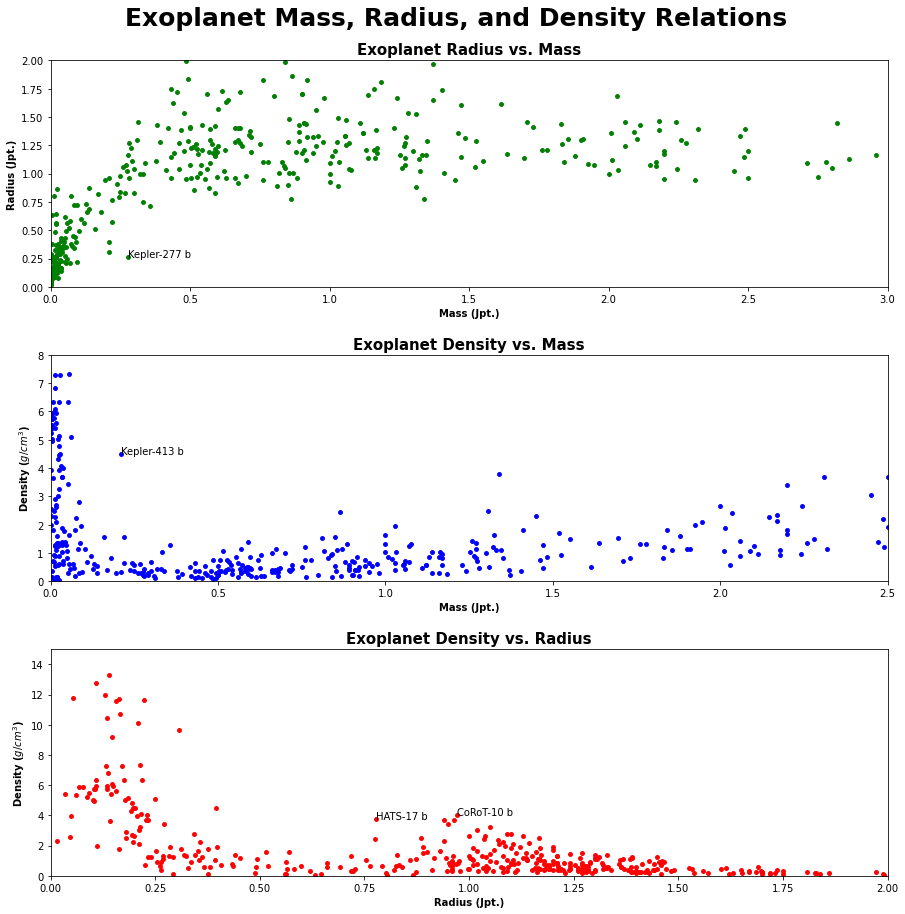

In [147]:
#Size
plt.figure(figsize=(15,15))

#Mass vs. Radius Plot
plt.subplot(311)
#Variables
x = df.Mass
y = df.Radius
name = df.Name
#Scatter
plt.scatter(x,y,s=15,c='g')
#Labels and limits
plt.title('Exoplanet Radius vs. Mass',fontweight='bold',fontsize=15)
plt.xlabel('Mass (Jpt.)',fontweight='bold')
plt.xlim(0,3)
plt.ylabel('Radius (Jpt.)',fontweight='bold')
plt.ylim(0,2)
#Finding the possible outliers and labeling them
xList = list(x)
yList = list(y)
nameList = list(name)
for i in range(len(xList)):
    name = nameList[i]
    x = xList[i]
    y = yList[i]
    if x > 0.25 and y < 0.5: 
        plt.annotate(name,(x,y),color='black')

#Mass vs. Density Plot
plt.subplot(312)
#Setting variables
x = df.Mass
y = df.Density
name = df.Name
#Scatter
plt.scatter(x,y,s=15,c='b')
#Labels and limits
plt.title('Exoplanet Density vs. Mass',fontweight='bold',fontsize=15)
plt.xlabel('Mass (Jpt.)',fontweight='bold')
plt.xlim(0,2.5)
plt.ylabel('Density ($g/cm^3$)',fontweight='bold')
plt.ylim(0,8)
#Fiding possible outliers and labelling them
xList = list(x)
yList = list(y)
nameList = list(name)
for i in range(len(xList)):
    name = nameList[i]
    x = xList[i]
    y = yList[i]
    if x > 0.2 and y > 4: 
        plt.annotate(name,(x,y),color='black')

#Radius vs. Density Plot
plt.subplot(313)
#Setting variables
x = df.Radius
y = df.Density
name = df.Name
#Scatter
plt.scatter(x,y,s=15,c='r')
#Labels and limits for graph
plt.title('Exoplanet Density vs. Radius',fontweight='bold',fontsize=15)
plt.xlabel('Radius (Jpt.)',fontweight='bold')
plt.xlim(0,2)
plt.ylabel('Density ($g/cm^3$)',fontweight='bold')
plt.ylim(0,15)
#Finding possible outliers and labeling them
xList = list(x)
yList = list(y)
nameList = list(name)
for i in range(len(xList)):
    name = nameList[i]
    x = xList[i]
    y = yList[i]
    if x > 0.75 and x < 1.25 and y > 3.7: 
        plt.annotate(name,(x,y),color='black')

#Overarching title for all 3 plots
plt.suptitle('Exoplanet Mass, Radius, and Density Relations',fontweight='bold',fontsize='25',y=0.93)
#Padding
plt.subplots_adjust(hspace=0.3)

plt.show()